## Week 2-2 - Visualizing General Social Survey data

Your mission is to analyze a data set of social attitudes by turning it into vectors, then visualizing the result.

### 1. Choose a topic and get your data

We're going to be working with data from the General Social Survey, which asks Americans thousands of questions ever year, over decades. This is an enormous data set and there have been very many stories written from its data. The first thing you need to do is decide which questions and which years you are going to try to analyze.

Use their [data explorer](https://gssdataexplorer.norc.org/) to see what's available, and ultimately download an Excel file with the data. 

- Click the `Search Varibles` button.
- You will need at least a dozen or two related variables. Try selecting some using their `Filter by Module / Subject` interface.
- When you've made your selection, click the `+ All` button to add all listed variables, then choose `Extract Data` under the `Actions` menu.
- Then you have a multi-step process. Step 1 is just naming your extract
- Step 2: select variables *again!* Click `Add All` in the upper right of the "Variable Cart" in the "Choose Variables" step.
- Step 3: Skip it. You could use this to filter the data in various ways. 
- Step 4: Click `Select certain years` to pick one year of data, then check `Excel Workbook (data + metadata)` as the output format.
- Click `Create Extract` and wait a minute or two on the "Extracts" page until the spinner stops and turns into a download link.

You'll end up with an compressed file in tar.gz format, which you should be able to decompressed by double-clicking on it. Inside is an Excel file. Open it in Excel (or your favorite spreadsheet program) and resave it as a CSV.





In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [2]:
#My data
gss = pd.read_csv('General Social Survey.csv')
gss.head()

,Gss year for this respondent,Who makes decision about how to bring up children,Single parents can raise kids as well as two,How often meet face to face with co-workers to work on projects,"How often meet face to face with customers, clients, patients",R heard of persons in r's firm having jobs replaced by computers,Jobs created are better than r's current job,Science makes our lives better,Interested in technologies,Suicide if tired of living,Suicide if dishonored family,Suicide if bankrupt,Suicide if incurable disease,Rs living standard compared to parents,Reason not living with parents,Living with parents when 16 yrs old,Respondent id number,Ballot used for interview
0,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Very interested,Yes,Yes,Yes,Yes,Not applicable,Not applicable,Mother & father,1.0,Ballot a
1,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Moderately interested,Yes,No,No,Yes,About the same,Not applicable,Mother & father,2.0,Ballot b
2,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,About the same,Not applicable,Mother & father,3.0,Ballot c
3,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Moderately interested,Yes,Yes,Yes,Yes,Not applicable,"Divorce,separated",Mother,4.0,Ballot a
4,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,About the same,Not applicable,Mother & father,5.0,Ballot c


In [3]:
gss.shape

(2869, 18)

In [4]:
gss.tail()

,Gss year for this respondent,Who makes decision about how to bring up children,Single parents can raise kids as well as two,How often meet face to face with co-workers to work on projects,"How often meet face to face with customers, clients, patients",R heard of persons in r's firm having jobs replaced by computers,Jobs created are better than r's current job,Science makes our lives better,Interested in technologies,Suicide if tired of living,Suicide if dishonored family,Suicide if bankrupt,Suicide if incurable disease,Rs living standard compared to parents,Reason not living with parents,Living with parents when 16 yrs old,Respondent id number,Ballot used for interview
2864,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,No,No,Yes,About the same,Not applicable,Mother & father,2865.0,Ballot b
2865,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Very interested,No,No,No,Yes,Not applicable,"Divorce,separated",Mother & stpfather,2866.0,Ballot a
2866,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Somewhat better,"Divorce,separated",Mother,2867.0,Ballot c
2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2868,Source,Data collection: General Social Survey\nCase S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gss.dtypes
gss.columns

Index(['Gss year for this respondent                       ',
       'Who makes decision about how to bring up children',
       'Single parents can raise kids as well as two',
       'How often meet face to face with co-workers to work on projects',
       'How often meet face to face with customers, clients, patients',
       'R heard of persons in r's firm having jobs replaced by computers',
       'Jobs created are better than r's current job',
       'Science makes our lives better', 'Interested in technologies',
       'Suicide if tired of living', 'Suicide if dishonored family',
       'Suicide if bankrupt', 'Suicide if incurable disease',
       'Rs living standard compared to parents',
       'Reason not living with parents', 'Living with parents when 16 yrs old',
       'Respondent id number', 'Ballot used for interview'],
      dtype='object')

In [6]:
gss.head(5)

,Gss year for this respondent,Who makes decision about how to bring up children,Single parents can raise kids as well as two,How often meet face to face with co-workers to work on projects,"How often meet face to face with customers, clients, patients",R heard of persons in r's firm having jobs replaced by computers,Jobs created are better than r's current job,Science makes our lives better,Interested in technologies,Suicide if tired of living,Suicide if dishonored family,Suicide if bankrupt,Suicide if incurable disease,Rs living standard compared to parents,Reason not living with parents,Living with parents when 16 yrs old,Respondent id number,Ballot used for interview
0,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Very interested,Yes,Yes,Yes,Yes,Not applicable,Not applicable,Mother & father,1.0,Ballot a
1,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Moderately interested,Yes,No,No,Yes,About the same,Not applicable,Mother & father,2.0,Ballot b
2,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,About the same,Not applicable,Mother & father,3.0,Ballot c
3,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Moderately interested,Yes,Yes,Yes,Yes,Not applicable,"Divorce,separated",Mother,4.0,Ballot a
4,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,About the same,Not applicable,Mother & father,5.0,Ballot c


### 3. Turn people  into vectors
I know, it sounds cruel. We're trying to group people, but computers can only group vectors, so there we are. 

Translating the spreadsheet you downloaded from GSS Explorer into vectors is a multistep process. Generally, each row of the spreadsheet is one person, and each column is one qeustion. 

- First, we need to throw away any extra rows and columns: headers, questions with no data, etc.
- Many GSS questions already have numerical answers. These usually don't require any work.
- But you'll need to turn categorical variables into numbers.

Basically, you have to remove or convert every value that isn't a number. Because this is survey data, we can turn most questions into an integer scale. The cleanup might use functions like this:

In [7]:
# droping the last two rows, which are just notes and do not contain data
gss = gss.iloc[0:-2,:]
gss.tail(1)

,Gss year for this respondent,Who makes decision about how to bring up children,Single parents can raise kids as well as two,How often meet face to face with co-workers to work on projects,"How often meet face to face with customers, clients, patients",R heard of persons in r's firm having jobs replaced by computers,Jobs created are better than r's current job,Science makes our lives better,Interested in technologies,Suicide if tired of living,Suicide if dishonored family,Suicide if bankrupt,Suicide if incurable disease,Rs living standard compared to parents,Reason not living with parents,Living with parents when 16 yrs old,Respondent id number,Ballot used for interview
2866,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Somewhat better,"Divorce,separated",Mother,2867.0,Ballot c


In [8]:
gss['Who makes decision about how to bring up children'].value_counts()

Not applicable    2867
Name: Who makes decision about how to bring up children, dtype: int64

In [9]:
gss['How often meet face to face with co-workers to work on projects'].value_counts()

Not applicable    2867
Name: How often meet face to face with co-workers to work on projects, dtype: int64

In [10]:
gss['How often meet face to face with customers, clients, patients'].value_counts()

Not applicable    2867
Name: How often meet face to face with customers, clients, patients, dtype: int64

In [11]:
gss["R heard of persons in r's firm having jobs replaced by computers"].value_counts()

Not applicable    2867
Name: R heard of persons in r's firm having jobs replaced by computers, dtype: int64

In [12]:
gss["Jobs created are better than r's current job"].value_counts()

Not applicable    2867
Name: Jobs created are better than r's current job, dtype: int64

In [13]:
gss['Science makes our lives better'].value_counts()

Not applicable    2867
Name: Science makes our lives better, dtype: int64

In [14]:
gss['Interested in technologies'].value_counts()

Not applicable           1477
Moderately interested     637
Very interested           570
Not at all interested     179
No answer                   3
Dont know                   1
Name: Interested in technologies, dtype: int64

In [15]:
gss['Suicide if tired of living'].value_counts()

No                1470
Not applicable     979
Yes                373
Don't know          33
No answer           12
Name: Suicide if tired of living, dtype: int64

In [16]:
gss['Suicide if dishonored family'].value_counts()

No                1671
Not applicable     979
Yes                193
Don't know          17
No answer            7
Name: Suicide if dishonored family, dtype: int64

In [17]:
gss['Suicide if bankrupt'].value_counts()

No                1650
Not applicable     979
Yes                219
Don't know          12
No answer            7
Name: Suicide if bankrupt, dtype: int64

In [18]:
gss['Suicide if incurable disease'].value_counts()

Yes               1198
Not applicable     979
No                 630
Don't know          44
No answer           16
Name: Suicide if incurable disease, dtype: int64

In [19]:
gss['Rs living standard compared to parents'].value_counts()

Not applicable     912
Much better        573
Somewhat better    555
About the same     466
Somewhat worse     238
Much worse         100
Don't know          20
No answer            3
Name: Rs living standard compared to parents, dtype: int64

In [20]:
gss['Reason not living with parents'].value_counts()

Not applicable       1845
Divorce,separated     581
Other                 215
Parent died           195
Institution            13
No answer              12
Armed forces            4
Don't know              2
Name: Reason not living with parents, dtype: int64

In [21]:
gss['Living with parents when 16 yrs old'].value_counts()

Mother & father       1845
Mother                 489
Mother & stpfather     170
Other                  120
Father                  80
M and f relatives       70
Female relative         41
Father & stpmother      40
Male relative           10
No answer                2
Name: Living with parents when 16 yrs old, dtype: int64

In [22]:
gss['Respondent id number'].value_counts().head()

2827.0    1
815.0     1
2270.0    1
734.0     1
1442.0    1
Name: Respondent id number, dtype: int64

In [23]:
gss['Ballot used for interview'].value_counts()

Ballot c    979
Ballot b    977
Ballot a    911
Name: Ballot used for interview, dtype: int64

In [24]:
#Convertion of all values to small integers to make them easy to plot with colors.

gss = gss.replace({'Not applicable' : None, 
                   'No answer' : None, 
                   "Don't know" : None
                   })
 
gss= gss.replace({'Moderately interested':1,
                  'Very interested':2,
                  'Not at all interested':0})

gss=gss.replace({'Much better':2,
                'Somewhat better':1,
                 'About the same':0,
                 'Somewhat worse':-1,
                 'Much worse':-2})

gss = gss.replace({'Yes':1, 'No':-1,'Dont know':0})

gss= gss.replace({'Divorce,separated':1,
                  'Other':2,
                  'Parent died':3,
                  'Institution':4,
                  'Armed forces':5 
                 })

gss= gss.replace({'Mother & father':1,
                  'Mother':2,
                  'Mother & stpfather':3,
                  'Other':4,
                  'Father':5,
                  'M and f relatives':6,
                  'Female relative':7,
                  'Father & stpmother':8,
                  'Male relative':9 
                 })


gss = gss.drop(columns=['Respondent id number',
                'Ballot used for interview'])

gss = gss.replace({np.nan:0.0})

In [25]:
# I was breaking my head with this one....however, it was a huge space after it! :@
gss = gss.drop(columns=['Who makes decision about how to bring up children',
                        'Single parents can raise kids as well as two','How often meet face to face with co-workers to work on projects',
                        "How often meet face to face with customers, clients, patients",
                        "R heard of persons in r's firm having jobs replaced by computers",
                        "Jobs created are better than r's current job",'Science makes our lives better'],axis=1)

In [26]:
gss = gss.drop(columns=['Gss year for this respondent                       '])

In [27]:
gss.head(10)

,Interested in technologies,Suicide if tired of living,Suicide if dishonored family,Suicide if bankrupt,Suicide if incurable disease,Rs living standard compared to parents,Reason not living with parents,Living with parents when 16 yrs old
0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
6,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
8,2.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4. Plot those vectors!
For this assignment, we'll use the PCA projection algorithm to make 2D (or 3D!) pictures of the set of vectors. Once you have the vectors, it should be easy to make a PCA plot using the steps we followed in class.
    

In [28]:
#Principal Components Analysis 
# make a PCA plot here
model = PCA(n_components=2)
out = model.fit_transform(gss)

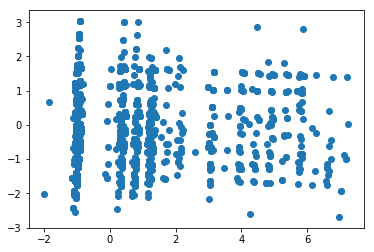

In [31]:
plt.scatter(out[:, 0], out[:, 1])
plt.show()

In [46]:
from mpl_toolkits.mplot3d import Axes3D
model = PCA(n_components=3)
out = model.fit_transform(gss.iloc[:,2:])  
ax = Axes3D(fig)
ax.view_init(elev=30, azim=45)
ax.scatter(out[:, 0], out[:, 1], out[:, 2])

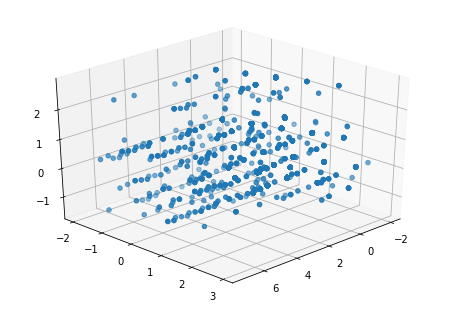

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=30, azim=45)
ax.scatter(out[:, 0], out[:, 1], out[:, 2])

### 5. Add color to help interpretation
Congratulations, you have a picture of a blob of dots. Hopefully, that blob has some structure representing clusters of similar people. To understand what the plot is telling us, it really helps to take one of the original variables and use it to assign colors to the points. 

So: pick one of the questions that you think will separate people into natural groups. Use it to set the color of the dots in your scatterplot. By repeating this with different questions, or combining questions (like two binary questions giving rise to a four color scheme) you should be able to figure out what the structure of the clusters represents. 


In [32]:
# map integer columns to colors
def col2colors(colvals):
    # gray for zero, then a rainbow.
    # This is set up so yes = 1 = red and no = -1 = indigo
    my_colors = ['gray', 'red','orange','yellow','lightgreen','cyan','blue','indigo']
    
    # We may have integers higher than len(my_colors) or less than zero
    # So use the mod operator (%) to make values "wrap around" when they go off the end of the list
    column_ints = colvals.astype(int) % len(my_colors)
    
    # map each index to the corresponding color
    return column_ints.apply(lambda x: my_colors[x])

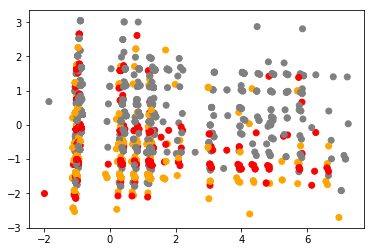

In [33]:
#Plots:

plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Interested in technologies']))
plt.show()

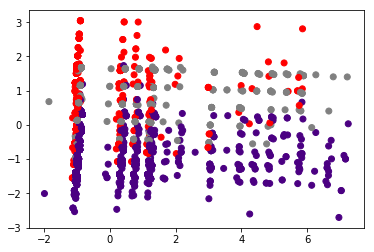

In [34]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Suicide if tired of living']))
plt.show()

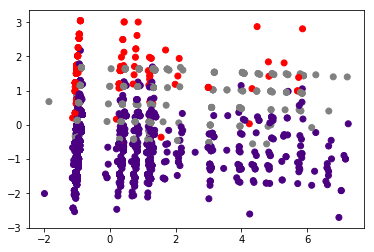

In [35]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Suicide if dishonored family']))
plt.show()

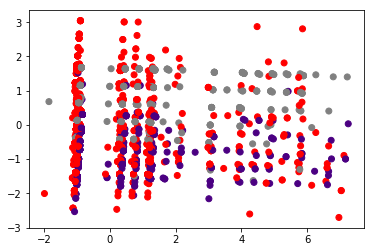

In [36]:
plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss['Suicide if incurable disease']))
plt.show()

### 6. Tell us what it means?
What did you learn from this exercise? Did you find the standard left-right divide? Or urban-rural? Early adopters vs. luddites? People with vs. without children? 

What did you learn? What could end up in a story? 
